In this notebook, we conduct various hypothesis tests corresponding to models considered in "linear_regression_part_I". 
We also conduct hypothesis tests for a similar set-up but just using data for a single company. We then fit a linear regression
to the most promising candidate, Goldman Sachs. 

In [ ]:
# import primary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# save raw dataframe with spike data 
spike_data = pd.read_csv("daily_spike_vs_none_1.5sigma_all.csv")

# drop WBA values because of a formatting issue
spike_data = spike_data[spike_data['Ticker'] != 'WBA']

We conduct some linear regression inference to back up apparent lack of connection found in linear_regression_part_I. To begin with we disregard the time-series aspect of the data.

In [53]:
# import statsmodels for hypothesis testing
import statsmodels.api as sum
import statsmodels.formula.api as smf

In [ ]:
# Cleaning the data 
X_cols = ['Spike', 'ExpectedDailyVariance', 'SP500_actual_volatility', 'SP500_expected_volatility']

# Convert columns to numeric types (will turn any non-numeric into NaN)
for col in X_cols + ['actual_volatility']:
    spike_data[col] = pd.to_numeric(spike_data[col], errors='coerce')

# Drop rows with any NaN in features or target (do this before fitting!)
clean_df = spike_data.dropna(subset=X_cols + ['actual_volatility'])

X = clean_df[X_cols]*1000
y = clean_df['actual_volatility'] *1000

In each of the following tests, our hypotheses are:
- $H_0$: The relationship is explained by the reduced model.
- $H_1$: The relationship is explained by the full model.


In [55]:
# Full model: actual_volatility ~ SP500_actual_volatility
data = {'A': y, 'B': X.SP500_actual_volatility}
full_model = smf.ols('A ~ B', data=data).fit()

# Reduced model: actual_volatility ~ 1
reduced_model = smf.ols('A ~ 1', data=data).fit()

# F-test
f_test = full_model.compare_f_test(reduced_model)

print("F-test p-value:", f_test[1])

if f_test[1] <= 0.05:
    print("p-value is below 0.05 so there is ") 
    print("justification for rejecting H_0 in favour of H_1.")
else:
    print("p-value is not below 0.05 so there is no ") 
    print("justification for rejecting H_0 in favour of H_1.")

F-test p-value: 0.0
p-value is below 0.05 so there is 
justification for rejecting H_0 in favour of H_1.


In [56]:
# Full model: actual_volatility ~ SP500_expected_volatility
data = {'A': y, 'B': X.SP500_expected_volatility}
full_model = smf.ols('A ~ B', data=data).fit()

# Reduced model: actual_volatility ~ 1
reduced_model = smf.ols('A ~ 1', data=data).fit()

# F-test
f_test = full_model.compare_f_test(reduced_model)

print("F-test p-value:", f_test[1])

if f_test[1] <= 0.05:
    print("p-value is below 0.05 so there is ") 
    print("justification for rejecting H_0 in favour of H_1.")
else:
    print("p-value is not below 0.05 so there is no ") 
    print("justification for rejecting H_0 in favour of H_1.")

F-test p-value: 0.1529057094995738
p-value is not below 0.05 so there is no 
justification for rejecting H_0 in favour of H_1.


In [57]:
# Full model: actual_volatility ~ SP500_actual_volatility + Spike
data = {'A': y, 'B': X.SP500_actual_volatility, 'C': X.Spike}
full_model = smf.ols('A ~ B + C', data=data).fit()

# Reduced model: actual_volatility ~ SP500_actual_volatility
reduced_model = smf.ols('A ~ B', data=data).fit()

# F-test
f_test = full_model.compare_f_test(reduced_model)

print("F-test p-value:", f_test[1])

if f_test[1] <= 0.05:
    print("p-value is below 0.05 so there is ") 
    print("justification for rejecting H_0 in favour of H_1.")
else:
    print("p-value is not below 0.05 so there is no ") 
    print("justification for rejecting H_0 in favour of H_1.")


F-test p-value: 0.13559427745444946
p-value is not below 0.05 so there is no 
justification for rejecting H_0 in favour of H_1.


In [58]:
# Full model: actual_volatility ~ SP500_actual_volatility 
# + SP500_expected_volatility
data = {'A': y, 'B': X.SP500_actual_volatility, 'C': X.Spike, 
        'D': X.SP500_expected_volatility}
full_model = smf.ols('A ~ B + D', data=data).fit()

# Reduced model: actual_volatility ~ SP500_actual_volatility 
reduced_model = smf.ols('A ~ B', data=data).fit()

# F-test
f_test = full_model.compare_f_test(reduced_model)

print("F-test p-value:", f_test[1])

if f_test[1] <= 0.05:
    print("p-value is below 0.05 so there is ") 
    print("justification for rejecting H_0 in favour of H_1.")
else:
    print("p-value is not below 0.05 so there is no ") 
    print("justification for rejecting H_0 in favour of H_1.")

F-test p-value: 9.237137228753396e-05
p-value is below 0.05 so there is 
justification for rejecting H_0 in favour of H_1.


In [59]:
# Full model: actual_volatility ~ SP500_actual_volatility 
# + SP500_expected_volatility + Spike
data = {'A': y, 'B': X.SP500_actual_volatility, 'C': X.Spike, 
        'D': X.SP500_expected_volatility}
full_model = smf.ols('A ~ B + C + D', data=data).fit()

# Reduced model: actual_volatility ~ SP500_actual_volatility 
# + SP500_expected_volatility
reduced_model = smf.ols('A ~ B + D', data=data).fit()

# F-test
f_test = full_model.compare_f_test(reduced_model)

print("F-test p-value:", f_test[1])

if f_test[1] <= 0.05:
    print("p-value is below 0.05 so there is ") 
    print("justification for rejecting H_0 in favour of H_1.")
else:
    print("p-value is not below 0.05 so there is no ") 
    print("justification for rejecting H_0 in favour of H_1.")

F-test p-value: 0.11627217164166025
p-value is not below 0.05 so there is no 
justification for rejecting H_0 in favour of H_1.


From the hypothesis tests, we see that there is a statistically significant connection between actual volatility and the SP500 actual volatility. Similarly, there is a statistically significant connection between actual volatility and the SP500 actual volatility together with the SP500 expected volatility.

We are not justified in positing a connection between social media spikes and actual volatility over and above the baseline predictors. 

Now we run hypothesis tests for each company separately. There could in theory be a connection between social media spikes for some but not others, or the connection could be different. Such connections would be obscured in the models given above.

In [ ]:
# Cleaning the data as before but including a Ticker column
U_cols = ['Spike', 'ExpectedDailyVariance', 'SP500_actual_volatility', 'SP500_expected_volatility']

# Convert columns to numeric types (will turn any non-numeric into NaN)
for col in U_cols + ['actual_volatility']:
    spike_data[col] = pd.to_numeric(spike_data[col], errors='coerce')

# Drop rows with any NaN in features or target (do this before fitting!)
clean_df = spike_data.dropna(subset=U_cols + ['actual_volatility'])


U = clean_df[U_cols]*1000
V = pd.DataFrame(clean_df['actual_volatility']*1000)
U["Ticker"]= clean_df["Ticker"]
V["Ticker"]= clean_df["Ticker"]

In [ ]:
U_by_tick = {}
V_by_tick = {}

# collect a list of tickers
unique_tickers = spike_data.Ticker.unique()

# create dataframes for each ticker
for tick in unique_tickers:
    U_by_tick[tick] = U[U["Ticker"] == tick].drop("Ticker", axis=1)
    V_by_tick[tick] = V[V["Ticker"] == tick].drop("Ticker", axis=1)

# lists to store outcomes of hypothesis testing for each ticker
f_test_p_vals = []
reject_nulls = []

#conduct hypothesis test to see if we are justified in positing a connection between spike and actual volatility 
#(in addition to baseline) for any of the companies. 
for tick in unique_tickers:
    # Full model: actual_volatility ~ SP500_actual_volatility 
    # + SP500_expected_volatility + Spike
    data = {'A': V_by_tick[tick], 
            'B': U_by_tick[tick].SP500_actual_volatility, 
            'C': U_by_tick[tick].Spike, 
            'D': U_by_tick[tick].SP500_expected_volatility}
    full_model = smf.ols('A ~ B + C + D', data=data).fit()

    # Reduced model: actual_volatility ~ SP500_actual_volatility 
    # + SP500_expected_volatility
    reduced_model = smf.ols('A ~ B + D', data=data).fit()

    # F-test
    f_test = full_model.compare_f_test(reduced_model)

    f_test_p_vals+=  [f_test[1]]

    if f_test[1] <= 0.05:
        reject_nulls += [True]
    else:
        reject_nulls += [False]

#store results in a dataframe
hypothesis_test = pd.DataFrame({"Ticker": np.asarray(unique_tickers), 
                             "f-test p-value": f_test_p_vals,
                             "reject null hypothesis?": reject_nulls})


,Ticker,f-test p-value,reject null hypothesis?
0,AAPL,0.534390,False
1,ABBV,0.024899,True
2,AMZN,0.423807,False
3,BA,0.001549,True
4,BAC,0.079510,False


In [62]:
#return a frame consisting of the companies for which the null-hypothesis should be rejected together with the p-value
hypothesis_rejected  = hypothesis_test[hypothesis_test["reject null hypothesis?"]==True].drop("reject null hypothesis?", axis=1)
hypothesis_rejected

,Ticker,f-test p-value
1,ABBV,2.489851e-02
3,BA,1.549025e-03
9,CNC,4.828578e-02
13,CSCO,4.096980e-02
16,DELL,3.509979e-02
17,DIS,3.792338e-04
41,TSLA,7.221095e-03
42,UNH,2.508665e-08
43,UPS,4.176486e-02
47,XOM,5.006582e-03


Some of these, therefore, are promising. We now try to fit the linear regression as before.

In [63]:
# we fit a naive linear regression

#import model for regression from sklearn
from sklearn.linear_model import LinearRegression

intercepts = []
Spike_coef =[]
SP500_av_coef = []
SP500_ev_coef = []
Rsquareds = []

#fit a naive linear regression for each company for which we were justified in rejecting the null hypothesis.
for tick in hypothesis_rejected["Ticker"]:

    # predictors (no need to include expected daily variance)
    X = U_by_tick[tick].drop("ExpectedDailyVariance",axis=1)
    # target
    y = V_by_tick[tick]

    # fit the model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    
    intercepts += [model.intercept_]
    coeflist=  [item for list in model.coef_ for item in list]
    Spike_coef += [coeflist[0]]
    SP500_av_coef += [coeflist[1]]
    SP500_ev_coef += [coeflist[2]]
    Rsquareds += [model.score(X,y)]

#store coefficients and R^2 in dataframe
results = pd.DataFrame({"Ticker": np.asarray(hypothesis_rejected["Ticker"]),
                        "Intercept": intercepts,
                        "Spike coef": Spike_coef,
                        "SP500 AV coef": SP500_av_coef,
                        "SP500 EV coef": SP500_ev_coef,
                        "R^2 score": Rsquareds})
results

,Ticker,Intercept,Spike coef,SP500 AV coef,SP500 EV coef,R^2 score
0,ABBV,[1.3698309961811952],-0.007327,0.429088,-0.043072,0.082922
1,BA,[1.5261907300154949],-0.010825,1.123629,-0.060425,0.341006
2,CNC,[-1.681619259372488],-0.011741,0.147196,0.083515,0.015099
3,CSCO,[0.1648203910102738],0.003240,0.946332,0.138365,0.617155
4,DELL,[1.2604193836040067],-0.009817,1.856122,0.055143,0.486065
5,DIS,[-0.22976026606575817],0.007978,0.942976,0.003701,0.441792
6,TSLA,[1.3967224268892748],-0.016793,2.509071,0.012964,0.444854
7,UNH,[0.5874537409240019],-0.024671,0.311060,0.171953,0.100855
8,UPS,[-0.276819863707336],-0.007176,0.732427,0.038446,0.229885
9,XOM,[0.8693657130959757],-0.006694,0.479896,-0.129666,0.175280


No model exhibits a particularly promising R^2 score, so we go on to take into account the time series aspects of the data.

First, we undertake similar hypothesis testing but with lagged variables, varying the maximum lag considered (max_lag).

In [ ]:
# run hypothesis test comparing lagged actual volatility with mean prediction.

# lists to store outcomes of hypothesis testing for each max_lag
f_test_p_vals = []
reject_nulls = []

#EDA indicates that beyond 5 days is unlikely to have signal. Only consider max_lag between 1 and 5
lag_range = 6

for max_lag in range(1,lag_range):
    # Create lagged features grouped by Ticker
    for lag in range(1, max_lag + 1):
        spike_data[f'Spike_lag_{lag}'] = spike_data.groupby('Ticker')['Spike'].shift(lag)
        spike_data[f'Volatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_volatility'].shift(lag)
        spike_data[f'MarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['SP500_actual_volatility'].shift(lag)

    # Create target variable: future volatility (day after)
    spike_data['Volatility_next'] = spike_data.groupby('Ticker')['actual_volatility'].shift(-1)

    # Drop rows with any missing values for these lagged features or target
    lagged_Spikes = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] 
    lagged_av = [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)]
    lagged_SP500_av = [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

    features = lagged_Spikes + lagged_av + lagged_SP500_av

    #clean data
    spike_data_model = spike_data.dropna(subset=features + ['Volatility_next'])

    X = spike_data_model[features]
    y = spike_data_model['Volatility_next']
    
    # Full model: actual_volatility ~ lagged actual volatility
    data = {'A': y, 'C': X[lagged_av]}
    full_model = smf.ols('A ~ C', data=data).fit()

    # Reduced model: actual_volatility ~ 1
    reduced_model = smf.ols('A ~ 1', data=data).fit()

    # F-test
    f_test = full_model.compare_f_test(reduced_model)

    f_test_p_vals += [f_test[1]]

    if f_test[1] <= 0.05:
        reject_nulls += [True]
    else:
        reject_nulls += [False]

# return results in a dataframe
results = pd.DataFrame({"max lag": [i for i in range(1,lag_range)], "f-test p_val": f_test_p_vals, "reject null hyp?": reject_nulls})
results

,max lag,f-test p_val,reject null hyp?
0,1,2.022923e-132,True
1,2,3.419918e-128,True
2,3,1.494919e-125,True
3,4,9.023347e-119,True
4,5,7.279627e-123,True


Clearly, it is worth including the lagged actual volatility. There is no clear gain from increasing lags evident in the p-values, so most likely it is adequate to simply consider the 5 days before at most. This is what we would expect from the EDA.

In [ ]:
# run hypothesis test comparing adding lagged SP500 av with just lagged av.

# lists to store outcomes from hypthesis testing for each value of max_lag
f_test_p_vals = []
reject_nulls = []

# consider lags between 1 and 5
lag_range = 6

for max_lag in range(1,lag_range):
    # Create lagged features grouped by Ticker
    for lag in range(1, max_lag + 1):
        spike_data[f'Spike_lag_{lag}'] = spike_data.groupby('Ticker')['Spike'].shift(lag)
        spike_data[f'Volatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_volatility'].shift(lag)
        spike_data[f'MarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['SP500_actual_volatility'].shift(lag)

    # Create target variable: future volatility (day after)
    spike_data['Volatility_next'] = spike_data.groupby('Ticker')['actual_volatility'].shift(-1)

    # Drop rows with any missing values for these lagged features or target
    lagged_Spikes = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] 
    lagged_av = [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)]
    lagged_SP500_av = [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

    features = lagged_Spikes + lagged_av + lagged_SP500_av

    spike_data_model = spike_data.dropna(subset=features + ['Volatility_next'])

    X = spike_data_model[features]
    y = spike_data_model['Volatility_next']
    
     # Full model: actual_volatility ~ lagged actual volatility
    data = {'A': y, 'B': X[lagged_SP500_av], 'C': X[lagged_av]}
    full_model = smf.ols('A ~ B + C', data=data).fit()

    # Reduced model: actual_volatility ~ lagged actual volatility
    reduced_model = smf.ols('A ~ C', data=data).fit()

    # F-test
    f_test = full_model.compare_f_test(reduced_model)

    f_test_p_vals += [f_test[1]]

    if f_test[1] <= 0.05:
        reject_nulls += [True]
    else:
        reject_nulls += [False]

#return results in a dataframe
results = pd.DataFrame({"max lag": [i for i in range(1,lag_range)], "f-test p_val": f_test_p_vals, "reject null hyp?": reject_nulls})
results

,max lag,f-test p_val,reject null hyp?
0,1,4.648059e-04,True
1,2,7.395449e-04,True
2,3,1.329928e-02,True
3,4,1.241006e-05,True
4,5,3.848894e-11,True


It seems we should also add lagged SP500 actual volatility in addition to the lagged actual volatility.

In [66]:
# run hypothesis test comparing adding lagged av with just lagged SP500 av.

f_test_p_vals = []
reject_nulls = []

lag_range = 6

# consider lags between 1 and 5
for max_lag in range(1,lag_range):
    # Create lagged features grouped by Ticker
    for lag in range(1, max_lag + 1):
        spike_data[f'Spike_lag_{lag}'] = spike_data.groupby('Ticker')['Spike'].shift(lag)
        spike_data[f'Volatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_volatility'].shift(lag)
        spike_data[f'MarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['SP500_actual_volatility'].shift(lag)

    # Create target variable: future volatility (day after)
    spike_data['Volatility_next'] = spike_data.groupby('Ticker')['actual_volatility'].shift(-1)

    # Drop rows with any missing values for these lagged features or target
    lagged_Spikes = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] 
    lagged_av = [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)]
    lagged_SP500_av = [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

    features = lagged_Spikes + lagged_av + lagged_SP500_av

    spike_data_model = spike_data.dropna(subset=features + ['Volatility_next'])

    X = spike_data_model[features]
    y = spike_data_model['Volatility_next']
    
     # Full model: actual_volatility ~ actual volatility lagged
    data = {'A': y, 'B': X[lagged_SP500_av], 'C': X[lagged_av]}
    full_model = smf.ols('A ~ B + C', data=data).fit()

    # Reduced model: actual_volatility ~ lagged actual volatility
    reduced_model = smf.ols('A ~ B', data=data).fit()

    # F-test
    f_test = full_model.compare_f_test(reduced_model)

    f_test_p_vals += [f_test[1]]

    if f_test[1] <= 0.05:
        reject_nulls += [True]
    else:
        reject_nulls += [False]

#return results in a dataframe
results = pd.DataFrame({"max lag": [i for i in range(1,lag_range)], "f-test p_val": f_test_p_vals, "reject null hyp?": reject_nulls})
results

,max lag,f-test p_val,reject null hyp?
0,1,2.403510e-90,True
1,2,1.174899e-89,True
2,3,1.236895e-89,True
3,4,1.980732e-88,True
4,5,1.154910e-89,True


It is well-worth including both the lagged SP500 actual volatility and the lagged actual volatility. Thus, we establish this as our baseline model against which to test the effect of lagged social media spike data.

In [ ]:
# run hypothesis test comparing adding lagged spike data with baseline of lagged SP500 av and lagged av.

# lists for storing outcomes of hypothesis testing for each value of max_lag
f_test_p_vals = []
reject_nulls = []

# consider lags between 1 and 5
lag_range = 6

for max_lag in range(1,lag_range):
    # Create lagged features grouped by Ticker
    for lag in range(1, max_lag + 1):
        spike_data[f'Spike_lag_{lag}'] = spike_data.groupby('Ticker')['Spike'].shift(lag)
        spike_data[f'Volatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_volatility'].shift(lag)
        spike_data[f'MarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['SP500_actual_volatility'].shift(lag)

    # Create target variable: future volatility (day after)
    spike_data['Volatility_next'] = spike_data.groupby('Ticker')['actual_volatility'].shift(-1)

    # Drop rows with any missing values for these lagged features or target
    lagged_Spikes = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] 
    lagged_av = [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)]
    lagged_SP500_av = [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

    features = lagged_Spikes + lagged_av + lagged_SP500_av

    spike_data_model = spike_data.dropna(subset=features + ['Volatility_next'])

    X = spike_data_model[features]
    y = spike_data_model['Volatility_next']
    
     # Full model: actual_volatility ~ actual volatility lagged + SP500 actual volatility lagged + spikes lagged
    data = {'A': y, 'B': X[lagged_SP500_av], 'C': X[lagged_av], 'D': X[lagged_Spikes]}
    full_model = smf.ols('A ~ B + C + D', data=data).fit()

    # Reduced model: actual_volatility ~ lagged actual volatility + lagged SP500 actual volatility
    reduced_model = smf.ols('A ~ B + C', data=data).fit()

    # F-test
    f_test = full_model.compare_f_test(reduced_model)

    f_test_p_vals += [f_test[1]]

    if f_test[1] <= 0.05:
        reject_nulls += [True]
    else:
        reject_nulls += [False]

#return results in a dataframe
results = pd.DataFrame({"max lag": [i for i in range(1,lag_range)], "f-test p_val": f_test_p_vals, "reject null hyp?": reject_nulls})
results

,max lag,f-test p_val,reject null hyp?
0,1,0.307478,False
1,2,0.493550,False
2,3,0.629293,False
3,4,0.190149,False
4,5,0.248048,False


Indeed, there is no justification for positing a connection between lagged spike data in general and the actual volatility on a given day.

As above, we now repeat the process but restricting to inference for particular firms.

In [ ]:
# run hypothesis test comparing lagged av with mean prediction

# lists to store outcomes of hypothesis testing for each ticker and each value of max_lag
f_test_p_vals = []
reject_nulls = []
# list to keep track of which outcome corresponds to which ticker 
ticker = []

#create restricted dataframes based on ticker
spike_data_by_tick = {}

for tick in unique_tickers:
    spike_data_by_tick[tick] = spike_data[spike_data["Ticker"] == tick].copy()

# consider lags between 1 and 5
lag_range = 6

# run hypothesis testing for each ticker and each value of max_lag
for tick in unique_tickers:
    for max_lag in range(1,lag_range):
        
        # Create lagged features grouped by Ticker
        for lag in range(1, max_lag + 1):
            spike_data_by_tick[tick][f'Spike_lag_{lag}'] = spike_data_by_tick[tick]['Spike'].shift(lag)
            spike_data_by_tick[tick][f'Volatility_lag_{lag}'] = spike_data_by_tick[tick]['actual_volatility'].shift(lag)
            spike_data_by_tick[tick][f'MarketVolatility_lag_{lag}'] = spike_data_by_tick[tick]['SP500_actual_volatility'].shift(lag)

        # Create target variable: future volatility (day after)
        spike_data_by_tick[tick]['Volatility_next'] = spike_data_by_tick[tick]['actual_volatility'].shift(-1)

        # Drop rows with any missing values for these lagged features or target
        lagged_Spikes = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] 
        lagged_av = [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)]
        lagged_SP500_av = [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

        features = lagged_Spikes + lagged_av + lagged_SP500_av

        spike_data_model = spike_data_by_tick[tick].dropna(subset=features + ['Volatility_next'])

        X = spike_data_model[features]
        y = spike_data_model['Volatility_next']
        
        # Full model: actual volatility ~ lagged actual volatility

        data = {'A': y, 'C': X[lagged_av]}
        full_model = smf.ols('A ~ C', data=data).fit()

        # Reduced model: actual volatility ~ 1
        reduced_model = smf.ols('A ~ 1', data=data).fit()

        # F-test
        f_test = full_model.compare_f_test(reduced_model)

        f_test_p_vals += [f_test[1]]
        ticker += [tick]

        if f_test[1] <= 0.05:
            reject_nulls += [True]
        else:
            reject_nulls += [False]

# return results in a dataframe
lag_counts = []
for tick in unique_tickers:
    lag_counts += [i for i in range(1,lag_range)]

results_lagged_av_vs_mean = pd.DataFrame({"Ticker" : ticker, "max lag": lag_counts, "f-test p_val": f_test_p_vals, "reject null hyp?": reject_nulls})
results_lagged_av_vs_mean

,Ticker,max lag,f-test p_val,reject null hyp?
0,AAPL,1,4.059099e-08,True
1,AAPL,2,2.233555e-07,True
2,AAPL,3,5.794877e-08,True
3,AAPL,4,9.683015e-08,True
4,AAPL,5,1.333881e-08,True
...,...,...,...,...
235,XOM,1,2.072832e-04,True
236,XOM,2,9.920605e-04,True
237,XOM,3,2.402179e-03,True
238,XOM,4,3.534696e-03,True


Not all companies pass the hypothesis test for modelling even as a basic time series based on lagged instances of the target variable. We explore some basic metrics.

In [ ]:
print("Proportion of (firm,lag) pairs passing the test: ")
print(len(results_lagged_av_vs_mean[results_lagged_av_vs_mean["reject null hyp?"]==True])/len(results_lagged_av_vs_mean))

proportion of (firm,lag) pairs passing the test: 
0.7125


In [ ]:
# run hypothesis test comparing lagged SP500 av with mean prediction

# lists to store outcomes of hypothesis testing for each ticker and each value of max_lag
f_test_p_vals = []
reject_nulls = []

# list to keep track of which outcome corresponds to which ticker 
ticker = []

# dictionary with the data grouped by ticker
spike_data_by_tick = {}

for tick in unique_tickers:
    spike_data_by_tick[tick] = spike_data[spike_data["Ticker"] == tick].copy()

# consider lags between 1 and 5
lag_range = 6

# run hypothesis testing for each ticker and each value of max_lag
for tick in unique_tickers:

    for max_lag in range(1,lag_range):
        
        # Create lagged features grouped by Ticker
        for lag in range(1, max_lag + 1):
            spike_data_by_tick[tick][f'Spike_lag_{lag}'] = spike_data_by_tick[tick]['Spike'].shift(lag)
            spike_data_by_tick[tick][f'Volatility_lag_{lag}'] = spike_data_by_tick[tick]['actual_volatility'].shift(lag)
            spike_data_by_tick[tick][f'MarketVolatility_lag_{lag}'] = spike_data_by_tick[tick]['SP500_actual_volatility'].shift(lag)

        # Create target variable: future volatility (day after)
        spike_data_by_tick[tick]['Volatility_next'] = spike_data_by_tick[tick]['actual_volatility'].shift(-1)

        # Drop rows with any missing values for these lagged features or target
        lagged_Spikes = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] 
        lagged_av = [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)]
        lagged_SP500_av = [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

        features = lagged_Spikes + lagged_av + lagged_SP500_av

        spike_data_model = spike_data_by_tick[tick].dropna(subset=features + ['Volatility_next'])

        X = spike_data_model[features]
        y = spike_data_model['Volatility_next']
        
        # Full model: actual volatility ~ lagged SP500 actual volatility

        data = {'A': y, 'B': X[lagged_SP500_av]}
        full_model = smf.ols('A ~ B', data=data).fit()

        # Reduced model: actual volatility ~ 1
        reduced_model = smf.ols('A ~ 1', data=data).fit()

        # F-test
        f_test = full_model.compare_f_test(reduced_model)

        f_test_p_vals += [f_test[1]]
        ticker += [tick]

        if f_test[1] <= 0.05:
            reject_nulls += [True]
        else:
            reject_nulls += [False]

# return results in a dataframe 
lag_counts = []
for tick in unique_tickers:
    lag_counts += [i for i in range(1,lag_range)]

results_lagged_SP500av_vs_mean = pd.DataFrame({"Ticker" : ticker, "max lag": lag_counts, "f-test p_val": f_test_p_vals, "reject null hyp?": reject_nulls})
results_lagged_SP500av_vs_mean 

,Ticker,max lag,f-test p_val,reject null hyp?
0,AAPL,1,0.000016,True
1,AAPL,2,0.000146,True
2,AAPL,3,0.000934,True
3,AAPL,4,0.001424,True
4,AAPL,5,0.003474,True
...,...,...,...,...
235,XOM,1,0.089490,False
236,XOM,2,0.165782,False
237,XOM,3,0.217480,False
238,XOM,4,0.257942,False


It's a similar story for the lagged SP500 data. We consider the same metric.

In [ ]:
print("Proportion of (firm,lag) pairs passing the test: ")
print(len(results_lagged_SP500av_vs_mean[results_lagged_SP500av_vs_mean["reject null hyp?"]==True])/len(results_lagged_SP500av_vs_mean))

proportion of (firm,lag) pairs passing the test: 
0.44583333333333336


In [ ]:
# run hypothesis test comparing lagged SP500 av and lagged av with just lagged av

# lists to store outcomes of hypothesis testing for each ticker and each value of max_lag
f_test_p_vals = []
reject_nulls = []

# list to keep track of which outcome corresponds to which ticker 
ticker = []

# dictionary with the data grouped by ticker
spike_data_by_tick = {}

for tick in unique_tickers:
    spike_data_by_tick[tick] = spike_data[spike_data["Ticker"] == tick].copy()

# consider lags between 1 and 5
lag_range = 6

# run hypothesis testing for each ticker and each value of max_lag
for tick in unique_tickers:

    for max_lag in range(1,lag_range):
        
        # Create lagged features grouped by Ticker
        for lag in range(1, max_lag + 1):
            spike_data_by_tick[tick][f'Spike_lag_{lag}'] = spike_data_by_tick[tick]['Spike'].shift(lag)
            spike_data_by_tick[tick][f'Volatility_lag_{lag}'] = spike_data_by_tick[tick]['actual_volatility'].shift(lag)
            spike_data_by_tick[tick][f'MarketVolatility_lag_{lag}'] = spike_data_by_tick[tick]['SP500_actual_volatility'].shift(lag)

        # Create target variable: future volatility (day after)
        spike_data_by_tick[tick]['Volatility_next'] = spike_data_by_tick[tick]['actual_volatility'].shift(-1)

        # Drop rows with any missing values for these lagged features or target
        lagged_Spikes = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] 
        lagged_av = [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)]
        lagged_SP500_av = [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

        features = lagged_Spikes + lagged_av + lagged_SP500_av

        spike_data_model = spike_data_by_tick[tick].dropna(subset=features + ['Volatility_next'])

        X = spike_data_model[features]
        y = spike_data_model['Volatility_next']
        
        # Full model: actual_volatility ~ lagged actual volatility + lagged SP500 actual volatility

        data = {'A': y, 'B': X[lagged_SP500_av], 'C' : X[lagged_av]}
        full_model = smf.ols('A ~ B + C', data=data).fit()

        # Reduced model: actual volatility ~ lagged actual volatility
        reduced_model = smf.ols('A ~ C', data=data).fit()

        # F-test
        f_test = full_model.compare_f_test(reduced_model)

        f_test_p_vals += [f_test[1]]
        ticker += [tick]

        if f_test[1] <= 0.05:
            reject_nulls += [True]
        else:
            reject_nulls += [False]

# return results in a dataframe
lag_counts = []
for tick in unique_tickers:
    lag_counts += [i for i in range(1,lag_range)]

results_lagged_SP500av_and_av_vs_av = pd.DataFrame({"Ticker" : ticker, "max lag": lag_counts, "f-test p_val": f_test_p_vals, "reject null hyp?": reject_nulls})
results_lagged_SP500av_and_av_vs_av 

,Ticker,max lag,f-test p_val,reject null hyp?
0,AAPL,1,0.611276,False
1,AAPL,2,0.346258,False
2,AAPL,3,0.314767,False
3,AAPL,4,0.540547,False
4,AAPL,5,0.173505,False
...,...,...,...,...
235,XOM,1,0.780437,False
236,XOM,2,0.894140,False
237,XOM,3,0.783630,False
238,XOM,4,0.855253,False


In [ ]:
print("Proportion of (firm,lag) pairs passing the test: ")
print(len(results_lagged_SP500av_and_av_vs_av[results_lagged_SP500av_and_av_vs_av["reject null hyp?"]==True])/len(results_lagged_SP500av_and_av_vs_av))

proportion of (firm,lag) pairs passing the test: 
0.13333333333333333


There is on the whole little evidence we are justified in adding the SP500 average, so we will just use dependence on the lagged av as baseline model.

In [ ]:
# run hypothesis test comparing lagged spikes and lagged av with baseline of lagged av

# lists to store outcomes of hypothesis testing for each ticker and each value of max_lag
f_test_p_vals = []
reject_nulls = []

# list to keep track of which outcome corresponds to which ticker 
ticker = []

# dictionary with the data grouped by ticker
spike_data_by_tick = {}

for tick in unique_tickers:
    spike_data_by_tick[tick] = spike_data[spike_data["Ticker"] == tick].copy()

# consider lags between 1 and 5
lag_range = 6

# run hypothesis testing for each ticker and each value of max_lag
for tick in unique_tickers:

    for max_lag in range(1,lag_range):
        # Create lagged features grouped by Ticker
        for lag in range(1, max_lag + 1):
            spike_data_by_tick[tick][f'Spike_lag_{lag}'] = spike_data_by_tick[tick]['Spike'].shift(lag)
            spike_data_by_tick[tick][f'Volatility_lag_{lag}'] = spike_data_by_tick[tick]['actual_volatility'].shift(lag)
            spike_data_by_tick[tick][f'MarketVolatility_lag_{lag}'] = spike_data_by_tick[tick]['SP500_actual_volatility'].shift(lag)

        # Create target variable: future volatility (day after)
        spike_data_by_tick[tick]['Volatility_next'] = spike_data_by_tick[tick]['actual_volatility'].shift(-1)

        # Drop rows with any missing values for these lagged features or target
        lagged_Spikes = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] 
        lagged_av = [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)]
        lagged_SP500_av = [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

        features = lagged_Spikes + lagged_av + lagged_SP500_av

        spike_data_model = spike_data_by_tick[tick].dropna(subset=features + ['Volatility_next'])

        X = spike_data_model[features]
        y = spike_data_model['Volatility_next']
        
        # Full model: actual_volatility ~ actual volatility lagged

        data = {'A': y, 'B': X[lagged_Spikes], 'C' : X[lagged_av]}
        full_model = smf.ols('A ~ B + C', data=data).fit()

        # Reduced model: actual_volatility ~ 1
        reduced_model = smf.ols('A ~ C', data=data).fit()

        # F-test
        f_test = full_model.compare_f_test(reduced_model)

        f_test_p_vals += [f_test[1]]
        ticker += [tick]

        if f_test[1] <= 0.05:
            reject_nulls += [True]
        else:
            reject_nulls += [False]

# return results in a dataframe
lag_counts = []
for tick in unique_tickers:
    lag_counts += [i for i in range(1,lag_range)]

results_lagged_spikes_and_av_vs_av = pd.DataFrame({"Ticker" : ticker, "max lag": lag_counts, "f-test p_val": f_test_p_vals, "reject null hyp?": reject_nulls})
results_lagged_spikes_and_av_vs_av 

,Ticker,max lag,f-test p_val,reject null hyp?
0,AAPL,1,0.558043,False
1,AAPL,2,0.505288,False
2,AAPL,3,0.630901,False
3,AAPL,4,0.674509,False
4,AAPL,5,0.688073,False
...,...,...,...,...
235,XOM,1,0.054399,False
236,XOM,2,0.144679,False
237,XOM,3,0.058500,False
238,XOM,4,0.117563,False


In [ ]:
# print rows corresponding to each (company,firm) pair for whcih we are justified in rejecting the null hypothesis
results_lagged_spikes_and_av_vs_av[results_lagged_spikes_and_av_vs_av["reject null hyp?"]==True]

,Ticker,max lag,f-test p_val,reject null hyp?
9,ABBV,5,0.042362,True
66,CSCO,2,0.031867,True
67,CSCO,3,0.038248,True
69,CSCO,5,0.004820,True
105,GS,1,0.000101,True
106,GS,2,0.000011,True
107,GS,3,0.000021,True
108,GS,4,0.000036,True
109,GS,5,0.000123,True
121,IBM,2,0.040122,True


For most of the companies, we are not justified in positing a connection between lagged av together with lagged spike data. For some companies with some lag durations, we are more justfied but some p-values are close to 0.05, or the connection only holds with particular choices of lag. A notable exception is Goldman Sachs, so we investigate this a little closer.

In [ ]:
# create a hypothesis testing aggregated dataframe for GS for reference

results_GS_1 = results_lagged_av_vs_mean[results_lagged_av_vs_mean["Ticker"]=="GS"].copy()

results_GS_2 = results_lagged_spikes_and_av_vs_av[results_lagged_spikes_and_av_vs_av["Ticker"]=="GS"].copy()

results_GS = pd.concat([results_GS_1,results_GS_2], axis = 0)

results_GS["hyp test"] = 5*["lagged av vs mean"]+5*["lagged spikes and av vs lagged av"]

results_GS.reset_index(drop=True)

# print frame for reference
results_GS

,Ticker,max lag,f-test p_val,reject null hyp?,hyp test
105,GS,1,0.000869,True,lagged av vs mean
106,GS,2,0.004419,True,lagged av vs mean
107,GS,3,0.017664,True,lagged av vs mean
108,GS,4,0.023198,True,lagged av vs mean
109,GS,5,0.002352,True,lagged av vs mean
105,GS,1,0.000101,True,lagged spikes and av vs lagged av
106,GS,2,0.000011,True,lagged spikes and av vs lagged av
107,GS,3,0.000021,True,lagged spikes and av vs lagged av
108,GS,4,0.000036,True,lagged spikes and av vs lagged av
109,GS,5,0.000123,True,lagged spikes and av vs lagged av


In [ ]:
# regress GS volatility on lagged av and lagged spikes, time series cross-validate to find optimal lag

# import metrics for cv comparison and tools for time-series cv
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# create data by ticker again
spike_data_by_tick = {}

for tick in unique_tickers:
    spike_data_by_tick[tick] = spike_data[spike_data["Ticker"] == tick].copy()

# consider lags between 1 and 5
lag_range = 6

tick = "GS"

# array to store RMSE for each max_lag and each of the 5 splits
RMSEs= np.zeros((5,5))

# iterate over max_lag between 1 and 5, cross-validating for each (with identical TimeSeriesSplits)
for max_lag in range(1,6):
    # Create lagged features grouped by Ticker
    for lag in range(1, max_lag + 1):
        spike_data_by_tick[tick][f'Spike_lag_{lag}'] = spike_data_by_tick[tick]['Spike'].shift(lag)
        spike_data_by_tick[tick][f'Volatility_lag_{lag}'] = spike_data_by_tick[tick]['actual_volatility'].shift(lag)
        spike_data_by_tick[tick][f'MarketVolatility_lag_{lag}'] = spike_data_by_tick[tick]['SP500_actual_volatility'].shift(lag)

    # Create target variable: future volatility (day after)
    spike_data_by_tick[tick]['Volatility_next'] = spike_data_by_tick[tick]['actual_volatility'].shift(-1)

    # Drop rows with any missing values for these lagged features or target
    lagged_Spikes = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] 
    lagged_av = [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)]
    lagged_SP500_av = [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

    features = lagged_Spikes + lagged_av

    spike_data_model = spike_data_by_tick[tick].dropna(subset=features + ['Volatility_next'])

    X = spike_data_model[features]
    y = spike_data_model['Volatility_next']

    # Train-test split (chronological)
    split_date = '2025-04-01'
    train_mask = spike_data_model['Date'] < split_date
    test_mask = spike_data_model['Date'] >= split_date

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # form a time series k fold object with prediction horizon 1 (we only hope to predict 1 more day)
    kfold = TimeSeriesSplit(n_splits = 5,
                           test_size = 1)
    
    #run cross validation on the training sets, its acceptable to use TimeSeriesSplit since restricting by Ticker
    # gives a simple time series
    for i, (train_index, test_index) in enumerate(kfold.split(X_train, y_train)):
        X_train_train = X_train.iloc[train_index, :]
        y_train_train = y_train.iloc[train_index]

        ## get the holdout data
        X_holdout = X_train.iloc[test_index, :]
        y_holdout = y_train.iloc[test_index]

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_train, y_train_train)

        # Predictions and evaluation
        y_pred = model.predict(X_holdout)
        RMSEs[lag-1,i] = np.sqrt(mean_squared_error(y_holdout, y_pred))

# return rmse for the various splits and max lag values, include mean rmse for comparison
results = pd.DataFrame(RMSEs, columns = ["split 1 rmse", "split 2 rmse", "split 3 rmse", "split 4 rmse", "split 5 rmse" ])
results["mean rmse"] = results.mean(axis=1)
results["max lag"] = [1,2,3,4,5]
results


,split 1 rmse,split 2 rmse,split 3 rmse,split 4 rmse,split 5 rmse,mean rmse,max lag
0,0.023222,0.012266,0.012550,0.005577,0.003667,0.011456,1
1,0.023963,0.011833,0.012119,0.005214,0.003193,0.011264,2
2,0.023527,0.012167,0.011480,0.004656,0.002204,0.010807,3
3,0.023063,0.011550,0.010919,0.004421,0.003495,0.010690,4
4,0.020968,0.014402,0.015463,0.007801,0.002685,0.012264,5


There is not much to choose, but we will go with max lag being 4 since it minimises the mean rmse.

Test RMSE: 0.02174372885676794
Spike_lag_1: 0.0143
Spike_lag_2: -0.0059
Spike_lag_3: -0.0005
Spike_lag_4: 0.0079
Volatility_lag_1: 0.2049
Volatility_lag_2: -0.0278
Volatility_lag_3: -0.0403
Volatility_lag_4: 0.0308
Test R²: 0.0511


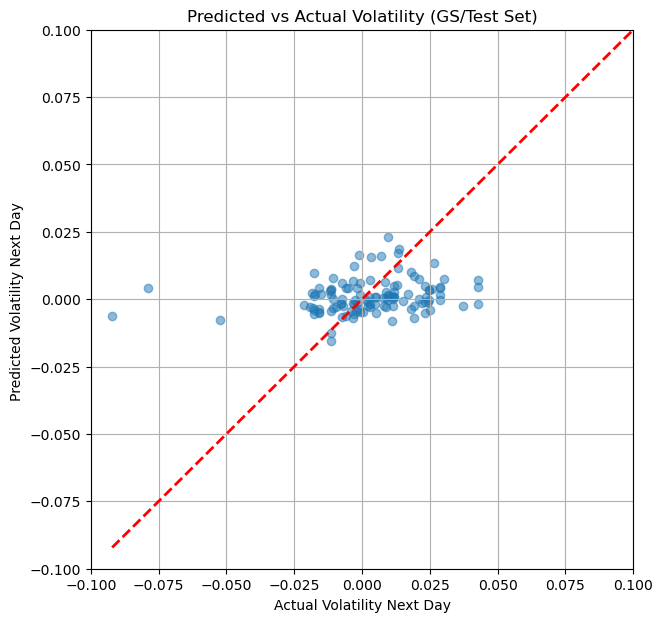

In [ ]:
# run regression with max_lag=2 and include plots

# we only consider Goldman Sachs
tick = "GS"

# set max_lag to be 4 as from cross validation
max_lag = 4

# Create lagged features grouped by Ticker
for lag in range(1, max_lag + 1):
    spike_data_by_tick[tick][f'Spike_lag_{lag}'] = spike_data_by_tick[tick]['Spike'].shift(lag)
    spike_data_by_tick[tick][f'Volatility_lag_{lag}'] = spike_data_by_tick[tick]['actual_volatility'].shift(lag)
    spike_data_by_tick[tick][f'MarketVolatility_lag_{lag}'] = spike_data_by_tick[tick]['SP500_actual_volatility'].shift(lag)

# Create target variable: future volatility (day after)
spike_data_by_tick[tick]['Volatility_next'] = spike_data_by_tick[tick]['actual_volatility'].shift(-1)

# Drop rows with any missing values for these lagged features or target
lagged_Spikes = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] 
lagged_av = [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)]
lagged_SP500_av = [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

features = lagged_Spikes + lagged_av

spike_data_model = spike_data_by_tick[tick].dropna(subset=features + ['Volatility_next'])

X = spike_data_model[features]
y = spike_data_model['Volatility_next']

# Train-test split (chronological)
split_date = '2025-04-01'
train_mask = spike_data_model['Date'] < split_date
test_mask = spike_data_model['Date'] >= split_date

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation for the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  
print("Test RMSE:", rmse)
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

r2_test = model.score(X_test, y_test)
print(f"Test R²: {r2_test:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Volatility Next Day')
plt.ylabel('Predicted Volatility Next Day ')
plt.title('Predicted vs Actual Volatility (GS/Test Set)')
plt.grid(True)

plt.xlim(-.1, .1)

# Set y-axis limits - zoom on predicted values between -0.1 and 0.1
plt.ylim(-.1, .1)

plt.show()

This is still not very promising even though we have used the most promising option from our hypothesis testing. This is to be expected. There was no particular reason uncovered in the EDA to suppose that Goldman-Sachs would be particularly unusual with regard to the dependency on spike data. Indeed, we have run the tests for 50 different companies and hence it is unsurprising that an artificially promising p-value may be returned for one out of many tested options.